In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
PATH = "chennai_house_price.csv"
dataset = pd.read_csv(PATH)
important_columns = ["price", "area", "status", "bhk", "bathroom", "age"]
dataset = dataset[important_columns].copy()
dataset["status"] = dataset["status"].replace({"Ready to move": 1, "Under Construction": 0}) # Делаем статусы целочисленными
dataset.dropna(inplace=True) # Удалили строки со значением Nan
dataset.reset_index(drop=True, inplace=True) # Пронумеровал id заново
dataset.rename(columns={"bhk": "bedrooms"}, inplace=True) # Изменить название столбца
dataset['price'] = dataset['price'].astype(int)
dataset.head(10)

,price,area,status,bedrooms,bathroom,age
0,49,1028,1,2,2.0,3.0
1,42,588,0,2,1.0,0.0
2,188,2221,0,3,3.0,0.0
3,240,1500,1,3,3.0,1.0
4,113,2343,1,4,4.0,5.0
5,50,1045,1,2,2.0,1.0
6,57,920,0,2,1.0,0.0
7,42,588,0,2,1.0,0.0
8,50,1152,1,2,3.0,1.0
9,47,920,0,2,2.0,0.0


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

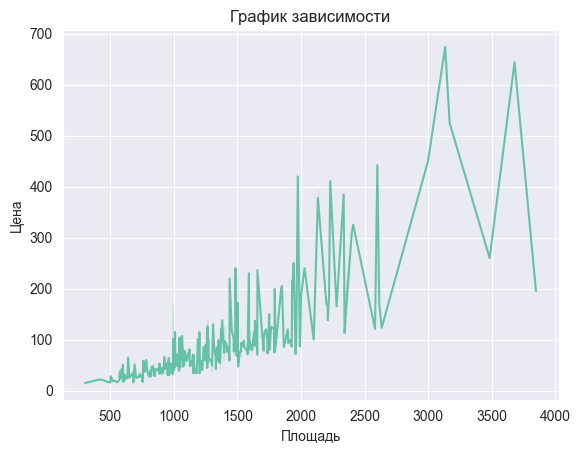

In [3]:
COLUMN_X = "area"
COLUMN_Y = "price"

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(
  x=dataset[COLUMN_X],
  y=dataset[COLUMN_Y],
)
plt.title('График зависимости')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

In [4]:
x = np.array(dataset[COLUMN_X]).reshape(-1, 1)
y = np.array(dataset[COLUMN_Y]).reshape(-1, 1)

In [5]:
DEGREES = 2
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 2085.6516361398003


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

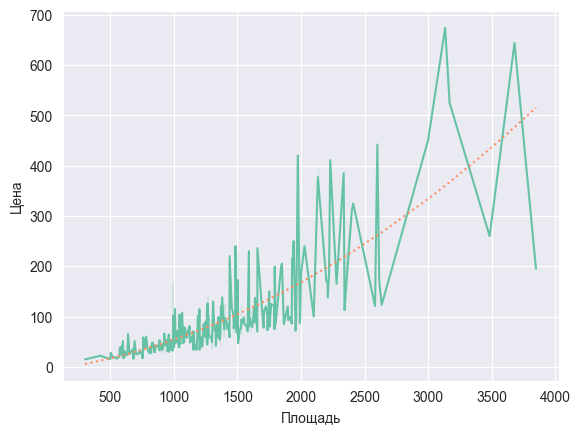

In [6]:
sns.lineplot(
  x=dataset[COLUMN_X],
  y=dataset[COLUMN_Y],
  linestyle="solid"
)
sns.lineplot(
  x=dataset[COLUMN_X],
  y=predictions.reshape(-1),
  linestyle="dotted"
)
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

In [7]:
x_parameters = np.append(
  regression['linearregression'].intercept_[0],
  regression['linearregression'].coef_[0][1:]
)
x_parameters

array([-7.28715641e+00,  3.57178815e-02,  2.60019879e-05])